# Selecionando as imagens


In [ ]:
import pandas as pd
import glob, os
import shutil 
os.chdir("C:/Users/maril/Desktop/repositorios/trabalho_diagostico_dicom/")

path_dataset_original = "C:/Users/maril/LIDC-IDRI/" 
#nesse caminho contem 50 pastas de CTs do dataset original totalizando 4GB em média


os.chdir(path_dataset_original)
for file in glob.glob("**/**/**/"):
    caminho_primeira_imagem = os.listdir(file)[0]
    #print(caminho_primeira_imagem)
    #print(file)
    array_path = file.split("\\")
    #print(array_path)
    shutil.copy2(file+caminho_primeira_imagem, "C:/Users/maril/Desktop/repositorios/trabalho_diagostico_dicom/dataset_final/"+array_path[0]+".dcm")


# <a id="2">Load packages</a>


In [345]:
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
import os
PATH="C:/Users/maril/Desktop/repositorios/trabalho_diagostico_dicom/"
print(os.listdir(PATH))

['.git', '.ipynb_checkpoints', 'dataset_final', 'LIDC-IDRI_MetaData.csv', 'meu_codigo_analise_metadados_dicom.ipynb', 'visualize-ct-dicom-data.ipynb']


# <a id="3">Read the data</a>


## <a id="31">Read overview data</a>


In [346]:
data_df = pd.read_csv(PATH+"/LIDC-IDRI_MetaData.csv")
print("CT Medical images -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

CT Medical images -  rows: 1398  columns: 11


In [347]:
data_df.head()

,Collection,Patient Id,Study Date,Study Description,Modality,Series Description,Manufacturer,Manufacturer Model,Software Version,Series UID,Unnamed: 10
0,LIDC-IDRI,LIDC-IDRI-0001,01/01/2000,NaN,CT,NaN,GE MEDICAL SYSTEMS,LightSpeed Plus,LightSpeedApps2.4.2_H2.4M5,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,NaN
1,LIDC-IDRI,LIDC-IDRI-0001,01/01/2000,NaN,DX,NaN,GE MEDICAL SYSTEMS,Revolution XQi ADS_28.2,Ads Application Package VERSION ADS_28.2,1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818...,NaN
2,LIDC-IDRI,LIDC-IDRI-0002,01/01/2000,NaN,CT,NaN,GE MEDICAL SYSTEMS,LightSpeed16,06MW03.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,NaN
3,LIDC-IDRI,LIDC-IDRI-0002,01/01/2000,NaN,DX,NaN,GE MEDICAL SYSTEMS,Revolution XRd ADS_27.5.4,Ads Application Package VERSION ADS_27.5.4,1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900...,NaN
4,LIDC-IDRI,LIDC-IDRI-0003,01/01/2000,NaN,CT,NaN,GE MEDICAL SYSTEMS,LightSpeed16,06MW03.5,1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615...,NaN


## <a id="33">Read DICOM data</a>


### Process DICOM data

In [385]:
def process_data(path):
    data= []
    for filepath in glob(PATH+path):
        dicom_atual = dicom.read_file(filepath)
        #print(dicom_atual.keys())
        data.append({'path': filepath, 
                     'ID':dicom_atual.PatientID, 
                     'Age':dicom_atual.PatientAge, 
                     'Manufacturer': dicom_atual.Manufacturer,
                     'Modality':dicom_atual.Modality,
                     'Software Version':dicom_atual.SoftwareVersions,
                     'ConvolutionKernel': dicom_atual.ConvolutionKernel})
    novo = pd.DataFrame(data)
    novo.head()
    return novo

In [386]:
dicom_data = process_data('dataset_final/*.dcm')

### Check DICOM data

In [402]:
dicom_data.head(10)

,Age,ConvolutionKernel,ID,Manufacturer,Modality,Software Version,path
0,,STANDARD,LIDC-IDRI-0001,GE MEDICAL SYSTEMS,CT,LightSpeedApps2.4.2_H2.4M5,C:/Users/maril/Desktop/repositorios/trabalho_d...
1,,STANDARD,LIDC-IDRI-0002,GE MEDICAL SYSTEMS,CT,06MW03.5,C:/Users/maril/Desktop/repositorios/trabalho_d...
2,,STANDARD,LIDC-IDRI-0003,GE MEDICAL SYSTEMS,CT,06MW03.5,C:/Users/maril/Desktop/repositorios/trabalho_d...
3,,STANDARD,LIDC-IDRI-0004,GE MEDICAL SYSTEMS,CT,06MW03.5,C:/Users/maril/Desktop/repositorios/trabalho_d...
4,,STANDARD,LIDC-IDRI-0005,GE MEDICAL SYSTEMS,CT,LightSpeedApps2.4.2_H2.4M5,C:/Users/maril/Desktop/repositorios/trabalho_d...
5,,STANDARD,LIDC-IDRI-0006,GE MEDICAL SYSTEMS,CT,06MW03.5,C:/Users/maril/Desktop/repositorios/trabalho_d...
6,,LUNG,LIDC-IDRI-0007,GE MEDICAL SYSTEMS,CT,LightSpeedApps2.4.2_H2.4M5,C:/Users/maril/Desktop/repositorios/trabalho_d...
7,,STANDARD,LIDC-IDRI-0008,GE MEDICAL SYSTEMS,CT,LightSpeedApps10.5_2.8.2I_H1.3M4,C:/Users/maril/Desktop/repositorios/trabalho_d...
8,,STANDARD,LIDC-IDRI-0009,GE MEDICAL SYSTEMS,CT,06MW03.5,C:/Users/maril/Desktop/repositorios/trabalho_d...
9,,STANDARD,LIDC-IDRI-0010,GE MEDICAL SYSTEMS,CT,06MW03.4,C:/Users/maril/Desktop/repositorios/trabalho_d...


# <a id="4">Data exploration</a>

## <a id="41">Check data consistency</a>



In [393]:
def countplot_comparison(feature):
    fig, (ax1, ax3) = plt.subplots(1,2, figsize = (16, 4))
    if feature in data_df.keys():
        s1 = sns.countplot(data_df[feature], ax=ax1)
        s1.set_title("Overview data")
    s3 = sns.countplot(dicom_data[feature], ax=ax3)
    s3.set_title("Dicom files data")
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
    plt.show()

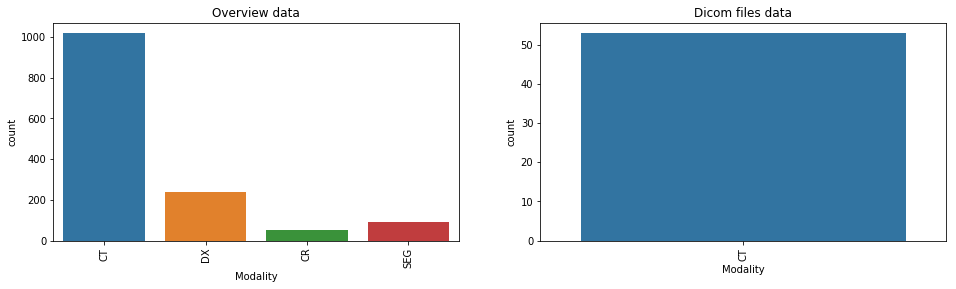

In [394]:
countplot_comparison('Modality')

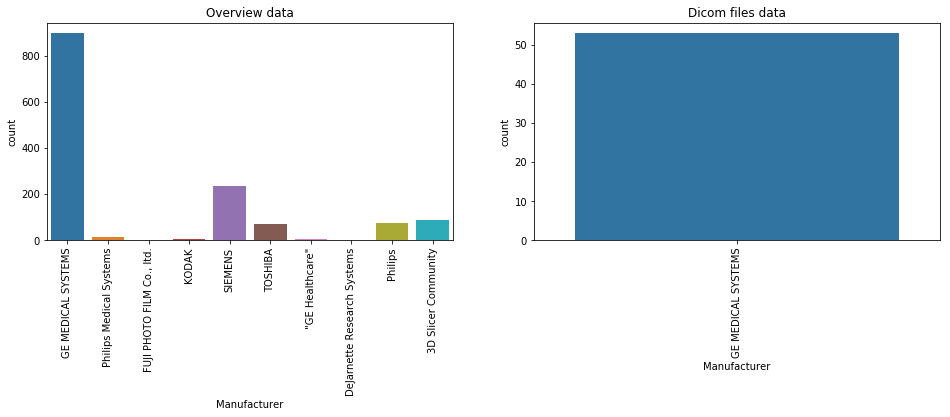

In [395]:
countplot_comparison('Manufacturer')

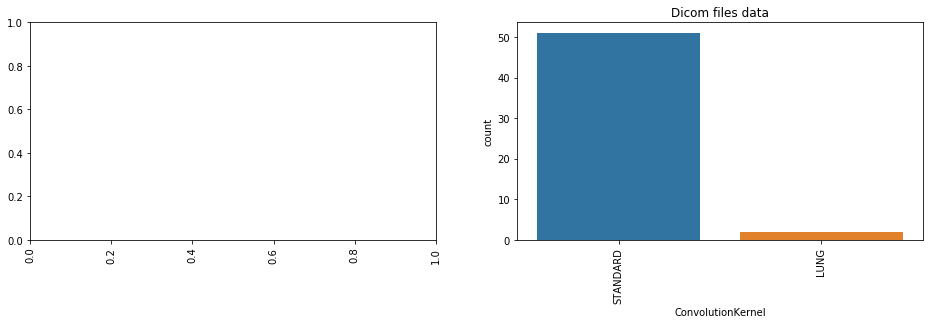

In [396]:
countplot_comparison('ConvolutionKernel')

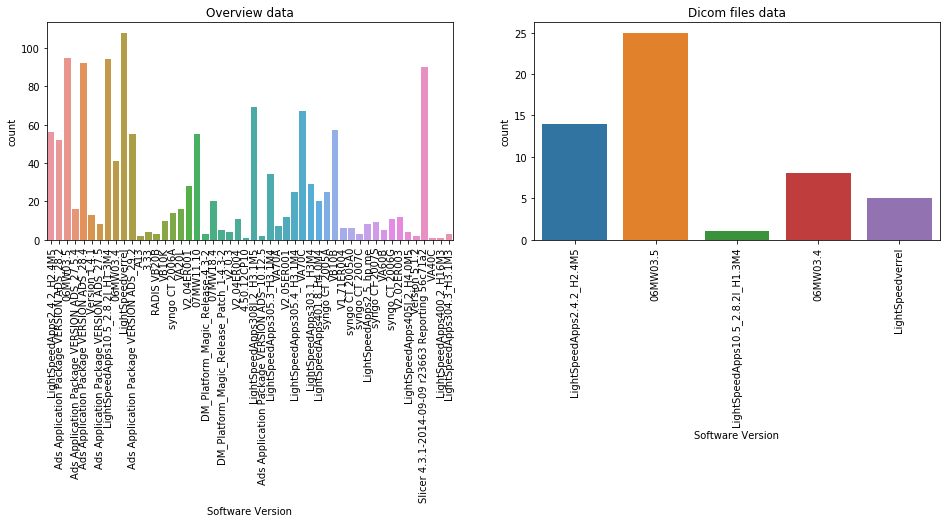

In [397]:
countplot_comparison('Software Version')

## <a id="43">Show DICOM data</a>


In [398]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = dicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} \n Age: {Age}\n Slice: {ID} \n Manufacturer: {Manufacturer} \n Software Version: {Software Version}\n Convolution Kernel:{ConvolutionKernel}'.format(**data_row))
    plt.show()

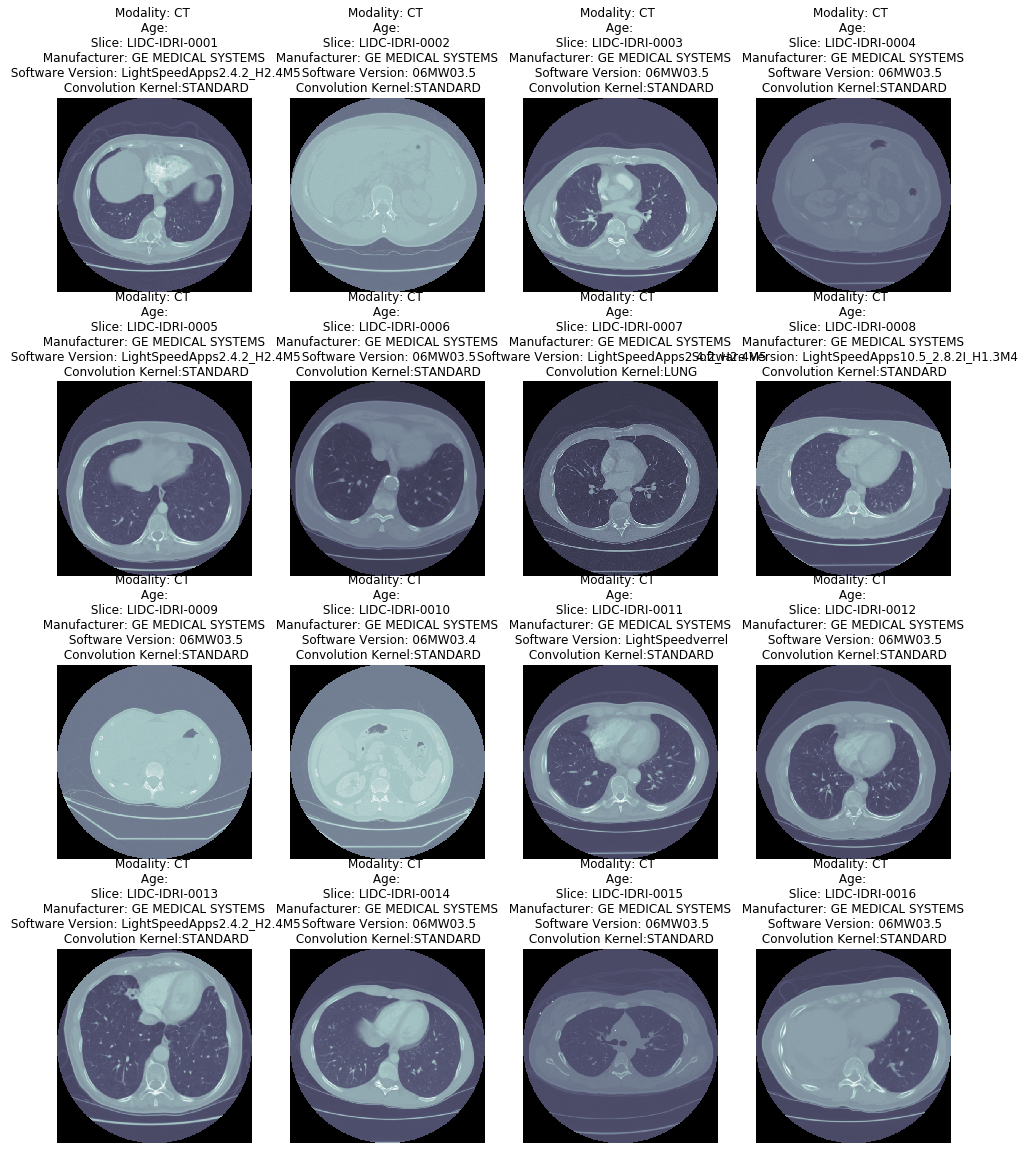

In [399]:
show_images(dicom_data,16,'DICOM')

### More about DICOM data


In [383]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.143451261327128179989900675595
(0008, 0020) Study Date                          DA: '20000101'
(0008, 0021) Series Date                         DA: '20000101'
(0008, 0022) Acquisition Date                    DA: '20000101'
(0008, 0023) Content Date                        DA: '20000101'
(0008, 0024) Overlay Date                        DA: '20000101'
(0008, 0025) Curve Date                          DA: '20000101'
(0008, 002a) Acquisition DateTime                DT: '20000101'
(0008, 0030) Study Time                          TM: ''
(0008, 0032) Acquisition Time                    TM: ''
(0008, 0033) Content Time                        TM: ''
(0008, 0050) Accession Number               

In [384]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: GE MEDICAL SYSTEMS
Patient Age: 
Patient Sex: 
Patient Name: 
Patient ID: LIDC-IDRI-0001


In [400]:
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        #ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         #modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()


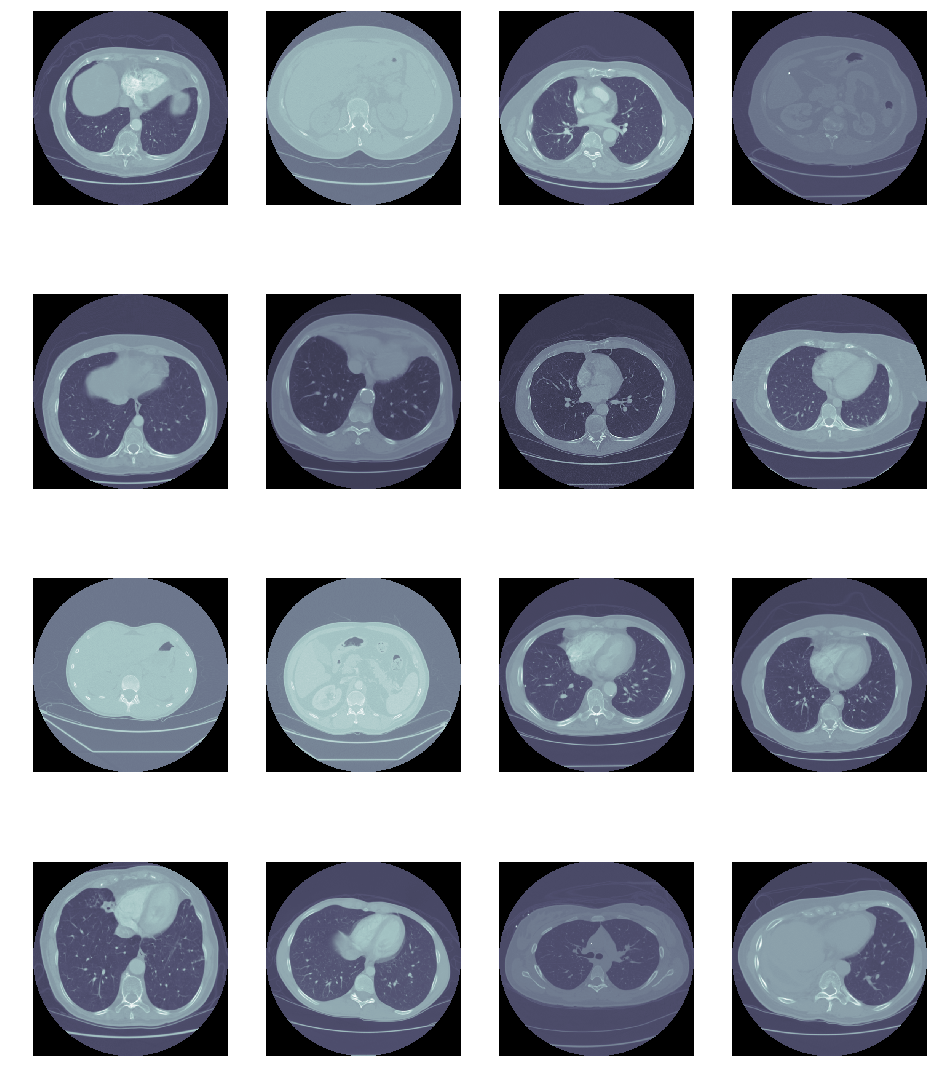

In [401]:
show_dicom_images(dicom_data)

In [ ]:
ddr